<a href="https://colab.research.google.com/github/Jinwooseol/Numpy-and-Pandas/blob/main/Plotting_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from numpy.random import randint

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv    # cache cleaning
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


- 런타임 다시 시작



   0
가  1
나  2
다  3


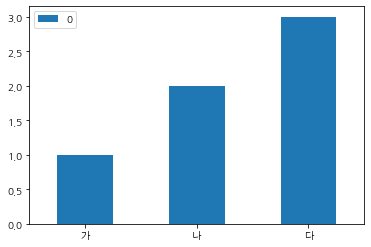

In [ ]:
df1 = pd.DataFrame([1,2,3], index = list('가나다'))
print(df1)
plt.rc('font', family = 'NanumGothic') # adapt font
df1.plot(kind = 'bar', rot = 0)

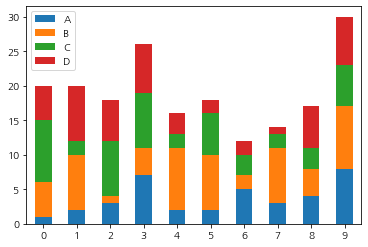

In [ ]:
df1 = pd.DataFrame(randint(1, 10, (10, 4)), columns = list('ABCD'))

# Same with df1.plot(kind = 'bar', stacked = True, rot = 0)
df1.plot.bar(stacked = True, rot=0)
# rot = 0 is rotation of x label

# 부산 지하철 시간대별 승하차 인원

   역번호       역명         년월일 요일  구분    합계  01시-02시  02시-03시  03시-04시  04시-05시  \
0   95  다대포해수욕장  2022-01-01  토  승차  5142        0        0        0       10   
1   95  다대포해수욕장  2022-01-01  토  하차  4430        0        0        0        1   
2   95  다대포해수욕장  2022-01-02  일  승차  3429        0        0        0        7   
3   95  다대포해수욕장  2022-01-02  일  하차  2992        0        0        0        0   
4   95  다대포해수욕장  2022-01-03  월  승차  4323        0        0        0       19   

   ...  15시-16시  16시-17시  17시-18시  18시-19시  19시-20시  20시-21시  21시-22시  \
0  ...      371      390      449      249      150      108      105   
1  ...      320      329      283      161      124       83      117   
2  ...      412      441      344      182       96      109       66   
3  ...      304      255      191      158      120       76      104   
4  ...      410      335      371      209      110       75       71   

   22시-23시  23시-24시  24시-01시  
0       39       10        3  
1       82       3

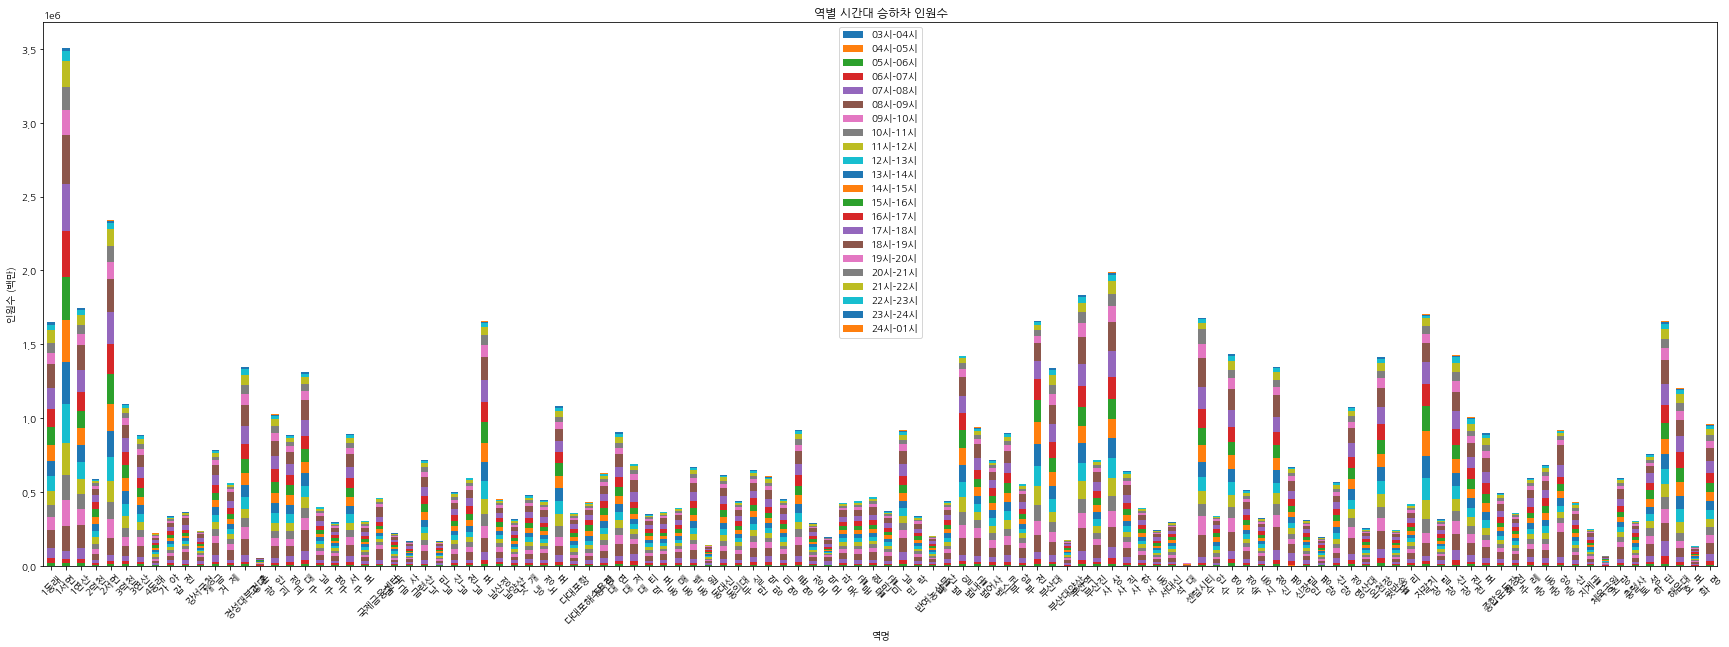

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/부산교통공사_시간대별 승하차인원_utf8.csv', encoding = 'utf8', header = [0])
print(pd_data.head(5))


data = pd_data.drop(['역번호', '년월일', '합계', '01시-02시', '02시-03시'], axis = 1).groupby('역명')
data.sum().plot.bar(stacked = True, figsize = (30, 10), rot = 45, title = '역별 시간대 승하차 인원수', ylabel = '인원수 (백만)')

# Multi-Index로 2시간씩 합치기 가능

# Histogram

   A  B  C  D
0  1  5  2  7
1  9  5  6  5
2  1  9  9  8
3  1  4  3  7
4  2  8  4  9
5  8  6  2  1
6  3  6  8  5
7  9  5  4  3
8  8  2  4  7
9  7  9  6  1


0    (0.992, 3.667]
1      (6.333, 9.0]
2    (0.992, 3.667]
3    (0.992, 3.667]
4    (0.992, 3.667]
5      (6.333, 9.0]
6    (0.992, 3.667]
7      (6.333, 9.0]
8      (6.333, 9.0]
9      (6.333, 9.0]
Name: A, dtype: category
Categories (3, interval[float64, right]): [(0.992, 3.667] < (3.667, 6.333] < (6.333, 9.0]]

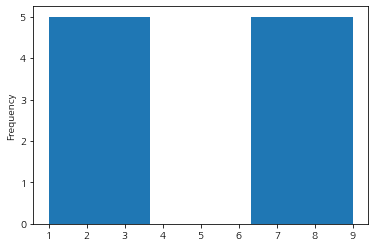

In [ ]:
df1  = pd.DataFrame(randint(1, 10, (10, 4)), columns = list('ABCD'))
print(df1)

df1['A'].plot.hist(bins = 3) # Number of bins
pd.cut(df1['A'], bins = 3)

# Auto mpg (cylinders)

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/auto-mpg.data', header = None, sep='\s+')
pd_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
pd_data.loc[:, 'horsepower'] = pd.to_numeric(pd_data.loc[:, 'horsepower'], errors='coerce') # object to float64 (errors='coerce': 변환이 불가할 경우 NaN으로 강제 변경)
print(pd_data.head(10))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   
5  15.0          8         429.0       198.0  4341.0          10.0   
6  14.0          8         454.0       220.0  4354.0           9.0   
7  14.0          8         440.0       215.0  4312.0           8.5   
8  14.0          8         455.0       225.0  4425.0          10.0   
9  15.0          8         390.0       190.0  3850.0           8.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1    

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


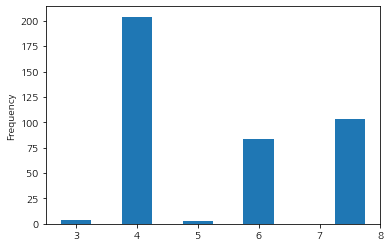

In [ ]:
pd_data['cylinders'].plot.hist(align = 'left', xlabel = 'Number of cylinders')
print(pd_data['cylinders'].value_counts())

# Box plot

          A         B         C         D         E
0 -0.789938 -0.468432 -1.154111 -1.293139 -2.589435
1 -0.195181  0.782052  0.294821  0.264866 -0.890412
2  0.335313 -0.976656  0.878808  0.636407 -1.115677
3 -0.567721  0.454614  1.749377 -0.799259  0.307085
4  0.063588 -0.962299  1.159809  0.680315  0.771343
5  0.658725  0.294819 -0.014305 -0.230847  0.757317
6 -0.341390  0.450565 -2.048356  0.156364  0.376622
7 -0.029930  0.424135 -0.807651  0.194827  1.032946
8 -0.228103 -0.225633  2.468906 -0.971643  1.293954
9  0.321500  0.629787 -0.888352 -0.604851 -0.395687
               A          B          C          D          E
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean   -0.077314   0.040295   0.163895  -0.196696  -0.045194
std     0.440689   0.651384   1.416607   0.690230   1.202997
min    -0.789938  -0.976656  -2.048356  -1.293139  -2.589435
25%    -0.313069  -0.407732  -0.868177  -0.750657  -0.766731
50%    -0.112555   0.359477   0.140258  -0.037242   0.341854
7

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


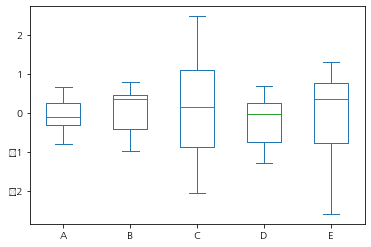

In [ ]:
df1 = pd.DataFrame(np.random.randn(10, 5), columns = list('ABCDE'))
print(df1)
print(df1.describe())
df1.plot.box()

          A         B         C         D         E  X
0 -0.789938 -0.468432 -1.154111 -1.293139 -2.589435  A
1 -0.195181  0.782052  0.294821  0.264866 -0.890412  A
2  0.335313 -0.976656  0.878808  0.636407 -1.115677  A
3 -0.567721  0.454614  1.749377 -0.799259  0.307085  A
4  0.063588 -0.962299  1.159809  0.680315  0.771343  A
5  0.658725  0.294819 -0.014305 -0.230847  0.757317  B
6 -0.341390  0.450565 -2.048356  0.156364  0.376622  B
7 -0.029930  0.424135 -0.807651  0.194827  1.032946  B
8 -0.228103 -0.225633  2.468906 -0.971643  1.293954  B
9  0.321500  0.629787 -0.888352 -0.604851 -0.395687  B


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


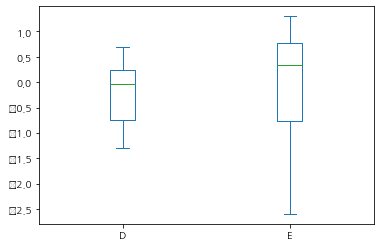

In [ ]:
df1['X'] = pd.Series(list('AAAAABBBBB'))
print(df1)
df1.plot.box(by = 'X', y = ['D', 'E'])

# Iris data

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900

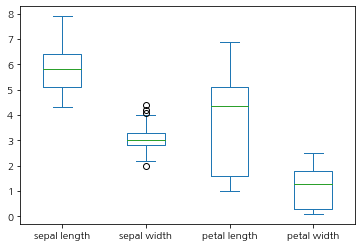

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/iris.data', header=None)
print(pd_data)
pd_data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
pd_data.plot.box()
print(pd_data.describe())

# Density plot

          A         B         C         D         E
0  0.624414 -0.804538 -0.002466  0.333512  0.092372
1  0.993570 -0.778587  0.338218 -0.322969 -0.333981
2 -0.312337 -1.416578  0.450859 -2.179513  1.339005
3 -1.166410 -1.283948 -0.611795  0.169983  0.612949
4  0.084758 -0.169560  0.022622 -0.737982  0.390288
5  0.734276  1.548266 -1.241275 -0.653569 -0.386746
6 -0.590874 -0.094059 -0.056922 -0.139184 -0.151342
7  0.737100  0.590491  1.333382 -0.214021  0.794326
8 -0.187179 -0.605383  0.572051  0.221817  0.143597
9 -0.518366 -0.734796  0.812634 -0.285309 -1.156038


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


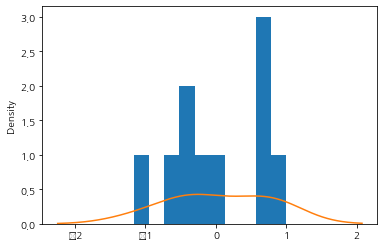

In [ ]:
df1 = pd.DataFrame(np.random.randn(10, 5), columns = list('ABCDE'))
print(df1)

df1['A'].plot.hist()
df1['A'].plot.density()

# 월별 황사 추이

# Area plot

    A   B   C   D
a  62  76  39  92
b  72  13   4  66
c  91  98  16  26


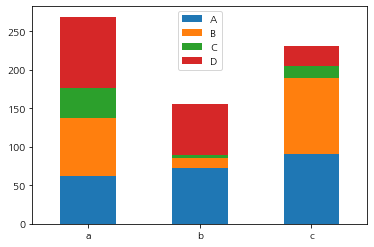

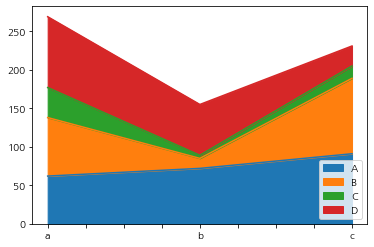

In [ ]:
df1 = pd.DataFrame(randint(0, 100, (3, 4)), index = list('abc'), columns = list('ABCD'))
print(df1)

df1.plot.bar(stacked = True, rot = 0)
df1.plot.area()

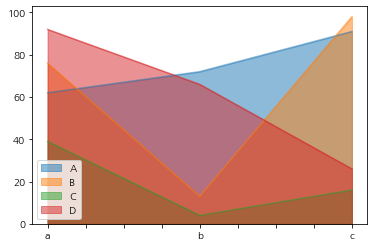

In [ ]:
df1.plot.area(stacked = False)

# 지하철
- x = 시간대
- y = 역별

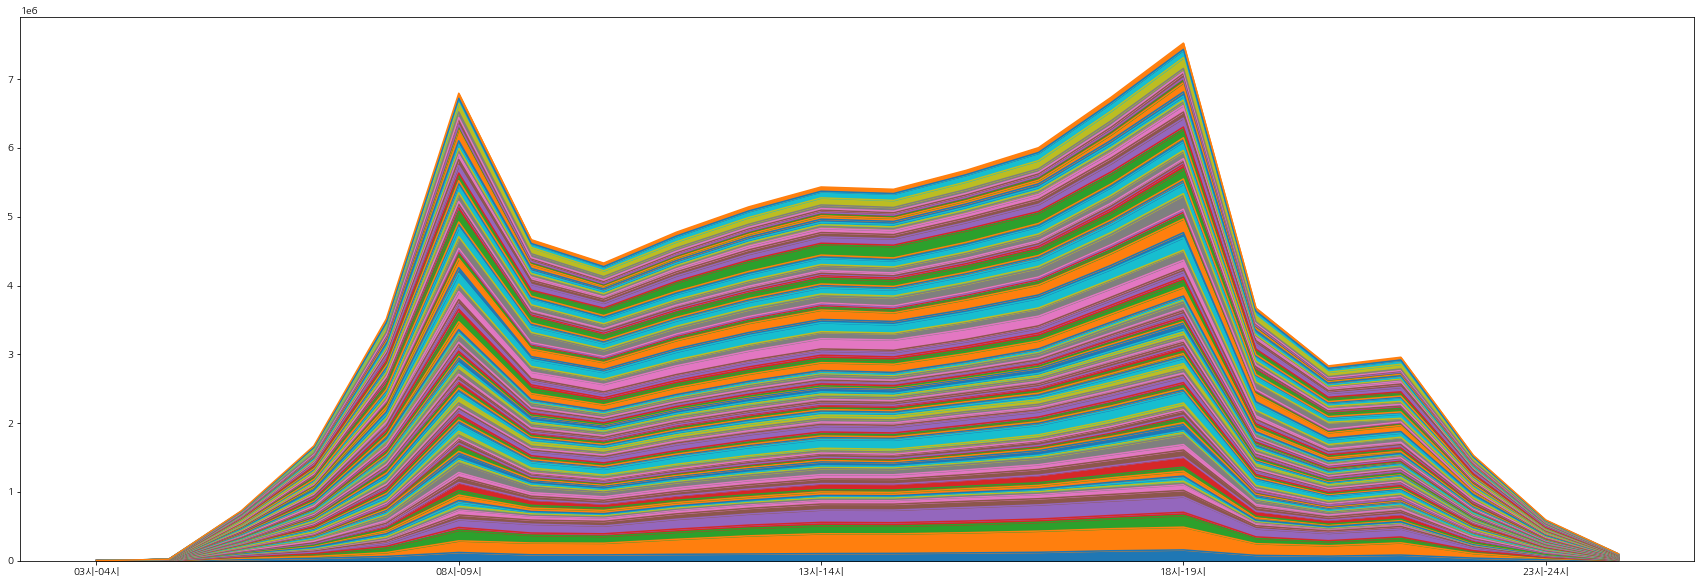

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Data/부산교통공사_시간대별 승하차인원_utf8.csv', encoding = 'utf8', header = [0])
data = pd_data.drop(['역번호', '년월일', '합계', '01시-02시', '02시-03시'], axis = 1).groupby('역명')
data.sum().T.plot.area(figsize = (30, 10), legend = False)

# Scatter plot

    A  B  C  D  E
0   7  3  5  8  8
1   1  3  7  6  2
2   5  7  5  4  4
3   1  9  7  8  5
4   3  1  7  6  9
5   6  3  1  2  4
6   5  6  4  9  8
7   9  1  6  6  4
8   9  3  6  8  2
9   6  4  4  9  4
10  9  1  2  4  6
11  6  3  4  9  3
12  8  4  7  8  3
13  7  9  5  9  4
14  8  9  7  5  4
15  2  7  8  4  8
16  6  8  9  1  7
17  8  5  7  4  5
18  3  5  8  3  3
19  5  1  1  4  1


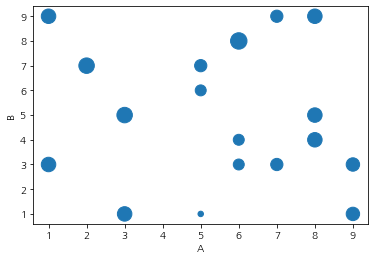

In [ ]:
df1 = pd.DataFrame(randint(1, 10, (20, 5)), columns = list('ABCDE'))
print(df1)

df1.plot.scatter(x = 'A', y = 'B', s = df1['C']*30) # s = size

# 전국 위치별 인구수 or 소득순위 등등

# Hexbin plot

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


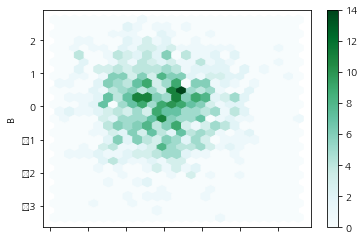

In [ ]:
df1 = pd.DataFrame(np.random.randn(1000, 2), columns = list('AB'))
df1.plot.hexbin(x='A', y = 'B', gridsize = 25)

# 교통사고 발생 빈도수 (위치별)
- 사고다발지역 선택을 위한 AI 설계 자료

# Pie chart

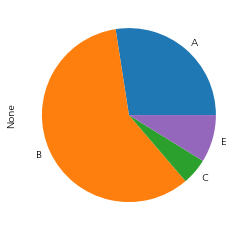

In [ ]:
s1 = pd.Series(randint(0, 100, 5), index = list('ABCDE'))
s1.plot.pie()

# 한국인, 외국인 pie chart

In [ ]:
pd_data = pd.read_csv('/content/drive/MyDrive/인공지능 학습/Project/구·군별_세대_및_인구.csv', encoding = 'utf8', header = [1, 2])
print(pd_data.head(5))
print(pd_data.columns)

pd_data.loc[0, [('한국인', '소계'), ('외국인', '소계')]].plot.pie()

  구군별(1) 세대수 (세대)   인구 (명)                    한국인 (명)                    \
  구군별(1)       소계       소계       남자       여자       소계       남자       여자   
0     합계  1497908  3466563  1704098  1762465  3413841  1675417  1738424   
1     중구    23160    44072    21904    22168    41910    20557    21353   
2     서구    52786   110350    53941    56409   108229    52627    55602   
3     동구    44657    90477    44416    46061    88165    43327    44838   
4    영도구    54859   118628    58806    59822   116711    57629    59082   

  외국인 (명)               세대당 인구 (명) 65세이상 고령자 (명) 평균연령 (세) 인구밀도 (명/㎢)  면적 (㎢)  
       소계     남자     여자         소계            소계       소계         소계      소계  
0   52722  28681  24041        2.3        620123     44.2       4502  770.07  
1    2162   1347    815        1.8         10744     48.9      15573    2.83  
2    2121   1314    807        2.1         26069     47.3       7893   13.98  
3    2312   1089   1223        2.0         22257     48.6       9167    9.87  


KeyError: ignored